# Exercise 1 - Overview

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, 
* formulate a null and alternative hypothesis (be as specific as you can be), 
* then give an example of what a true positive, true negative, type I and type II errors would look like. 

Note that some of the questions are intentionally phrased in a vague way. 

It is your job to reword these as more precise questions that could be tested.

### 1. Has the network latency gone up since we switched internet service providers?

#### T-Test

DISCREAT: Switched Providers New/Old
```vs```
CONTINUOUS: Mean of Latency

$H_{0}$: Mean of Latency.Old <= Mean of Latency.New

$H_{a}$: Mean of Latency.Old > Mean of Latency.New

True Pos: Rejected H0 and H0 was False (our True was True)
"Latency went up and we said it did"

True Neg: Accept the H0 and H0 is True (our False was True) 
"Latency went did not go up and we said it did not"

Type I Error: Rejected the H0 BUT the H0 was True (our True was False; No Wolf)
We rejected the NULL statement BUT it was NULL

Type II Error: Accept H0 BUT H0 is False (our False was True; We didn't believe in the Wolf BUT he was Real)
We accepted the NULL BUT it was not NULL

### 2. Is the website redesign any good?

Pearson's R 
```=``` 
CONTINUOUS:  
```vs```
CONTINUOUS: 

H0:

Ha:

True Pos:

True Neg:

Type I Error:

Type II Error:

### 3. Is our television ad driving more sales?

### T-Test

DISCREAT: Add Before/After
```vs```
CONTINUOUS: Mean of Sales

$H_{0}$: Mean of Sales.Before <= Mean of Sales.After

$H_{a}$: Mean of Sales.Before > Mean of Sales.After

True Pos: Rejected H0 and H0 was False (our True was True)
* "Sales increased after the Ad aired"
* We said it was True AND it was True
* We said it was Positive AND it was Positive

True Neg: Accept the H0 and H0 is True (our False was True) 
* "Sales did not increase after Ad aired"
* We said it was False AND it was False
* We said it was Negative AND it was Negative

Type I Error: Rejected the H0 BUT the H0 was True (our True was False; No Wolf)
* We rejected the NULL statement BUT it was NULL
* We said it was True BUT it was False
* We said it was Positive BUT it was Negative

Type II Error: Accept H0 BUT H0 is False (our False was True; We didn't believe in the Wolf BUT he was Real)
* We accepted the NULL BUT it was not NULL
* We said it was False BUT it was True
* We said it was Negative BUT it was Positive

# Exercise 2 - T-Test

Continue working in your ```hypothesis_testing``` notebook.

In [1]:
import pandas as pd

from math import sqrt
import numpy as np
import scipy.stats as stats
import statistics

import pydataset
from pydataset import data

import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

### 1. Answer with the type of test you would use (assume normal distribution):

### 1.1 Is there a difference in grades of students on the second floor compared to grades of all students?

#### ANSWER:
One-Sample T-test

```2nd_floor_grades.mean``` == ```all_grades.mean```
* One-Sample Mean vs Population Mean
* One Sample T-test
* 2-Tailed test ($H_{0}$ = Significantly Different ```== | !=```)

### 1.2 Are adults who drink milk taller than adults who dont drink milk?

#### ANSWER:
Independent T-Test (a.k.a. Two Sample T-Test)

```milk_drinkers.mean.height``` > ```non-milk_drinkers.mean.height```
* 1-tailed test ($H_{a}$ = Significantly higher or lower ```> | <=```)

### 1.3 Is the the price of gas higher in texas or in new mexico?

#### ANSWER:
Independent T-Test (a.k.a. Two Sample T-Test)

```texas_gas_price.mean``` > ```new_mexico_gas_price.mean```
* 1-tailed test ($H_{a}$ = Significantly higher or lower ```> | <=```)

### 1.4 Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

#### ANSWER:
ANOVA Analysis of Variance & Kruskal Wallis Test
* Goal: Compare means of groups a, b & c.
* Verify Assumptions: If assumptions are met, use ANOVA, if not, use Kruskall Wallis

```ds_stress.mean``` == ```wd_stress.mean``` == ```cloud_stress.mean```

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
* A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
* A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
* Use a .05 level of significance.

**A. Plot Distribution**

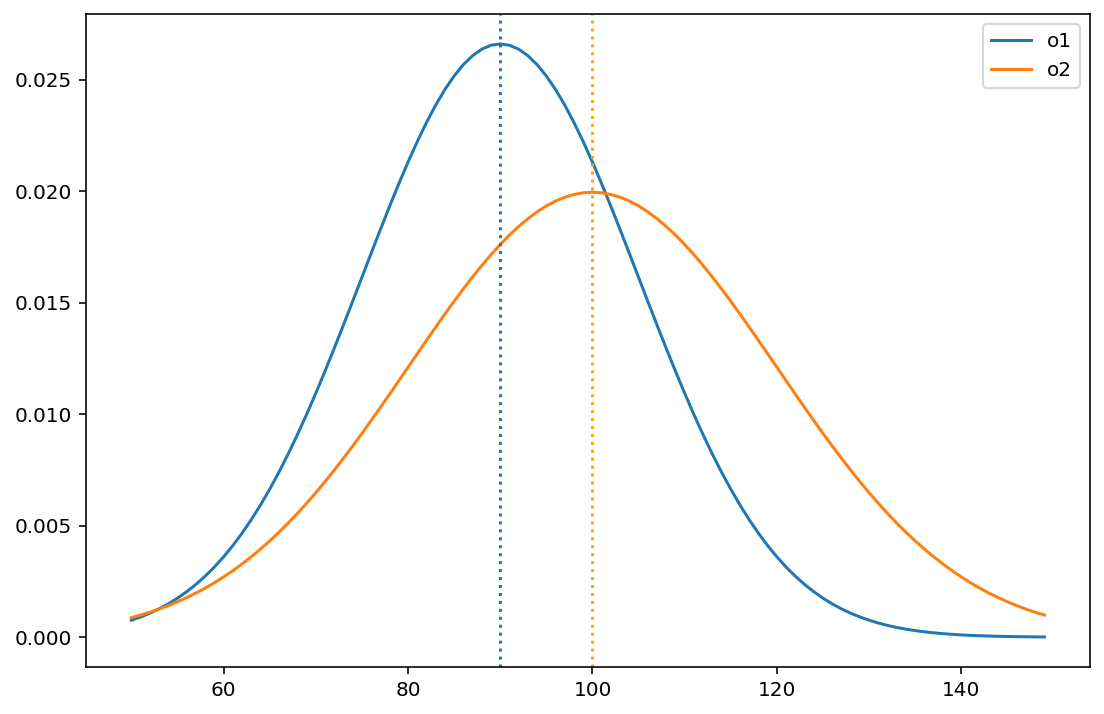

In [2]:
x = np.arange(50, 150)

o1 = stats.norm(90, 15).pdf(x)
o2 = stats.norm(100, 20).pdf(x)

plt.figure(figsize=(9, 6))
plt.plot(x, o1, label = 'o1')
plt.plot(x, o2, label = 'o2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

**B. Set Hypothesis**

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **Different = Two Tails**


* One Sample or Two Samples?\
 **Two Samples (o1, o2)**


* Continuous or Discreat?\
 **Discreat (o1, o2) vs Continuous (avg time) = T-Test**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: Office #1 Sales average ```equals``` Office #2 Sales average**\
 ```o1_sales_time.mean``` == ```o2_sales_time.mean```


* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: Office #1 Sales average is ```different than``` Office #2 Sales average**\
 ```o1_sales_time.mean``` != ```o2_sales_time.mean```

**C. Set Alpha**
* remember that our confidence level determines our alpha (```α```), 
* which we use to compare to ```p```

In [3]:
α = 0.05

**D. Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [4]:
o1 = stats.norm(90, 15).rvs(40)
o2 = stats.norm(100, 20).rvs(50)
print(o1.var())
print(o2.var())

162.32396813188566
497.04664234982044


In [5]:
# np.random.normal(loc = 'mean', scale = 'std', size = '(columns, rows)')
o1 = np.random.normal(loc = 90, scale = 15, size = (40))
o2 = np.random.normal(loc = 100, scale = 20, size = (50))
print(o1.var())
print(o2.var())

257.67457206539
341.92212909227567


**E. Compute test statistic and probability (t-statistic & p-value)**

- scipy.stats.ttest_1samp
- For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼  and  𝑡 > 0. 

In [6]:
stat, p_val = stats.levene(o1, o2)

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(o1, o2, equal_var = False)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')
else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(o1, o2, equal_var = True)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = True (we will assume equal variance)
t-stat: -2.092430969240626
p-value: 0.03927982449516951


### But we used random values?

We note that simulating the random values from the distributive stats are not providing us with the level of detail that we may want out of a problem like this. In order to get the most ideal results possible, we will conduct a slightly different variation of the test using ttest_ind_from_stats, which is more alligned with the information that has been posited to us in this specific scenario.

T-test using descriptive stats: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html

In [7]:
t_stat, pval = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
print(f't-stat: {t_stat}')
print(f'p-value: {p_val}')

t-stat: -2.7091418459143854
p-value: 0.03927982449516951


**F. DECIDE (Is p-value less than alpha?)**
* implications of one-tailed two-sampled t-test:
* p will be divided by two because we are only looking at one tail of the curve
* we will pay attention to the sign of our t-statistic
* t, p = t-test: (group A, group B) ==> comparison of mu_a > mu_b

In [8]:
"""
# One-Tail
if (t > 0) and ((p / 2) < α):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
"""

# Two-Tail
if p_val < α:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


### 3. Load the ```mpg``` dataset and use it to answer the following questions:

In [9]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### 3.1 Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

**A. Set Hypothesis**

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **Different = Two Tails**


* One Sample or Two Samples?\
 **Two Samples (1999, 2008)**


* Continuous or Discreat?\
 **Discreat (1999, 2008) vs Continuous (fuel_efficiency) = T-Test**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: 1999 fuel efficiency is ```the same as``` 2008 fuel efficiency**\
 ```1999_fuel_efficiency.mean``` == ```2008_fuel_efficiency.mean```


* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: 1999 fuel efficiency is ```different than``` 2008 fuel efficiency**\
 ```1999_fuel_efficiency.mean``` != ```2008_fuel_efficiency.mean```

Calculate average fuel economy assuming 50% highway and 50% city driving

- Harmonic mean should be used for averages of distance.
    - Arithmetic Mean: fe_am = (cty + hwy)/2
    - Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

In [10]:
mpg['fuel_efficiency'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


**B. Plot Distribution**

In [11]:
fe_1999 = mpg[mpg.year == 2008].fuel_efficiency
fe_2008 = mpg[mpg.year == 1999].fuel_efficiency

<AxesSubplot:>

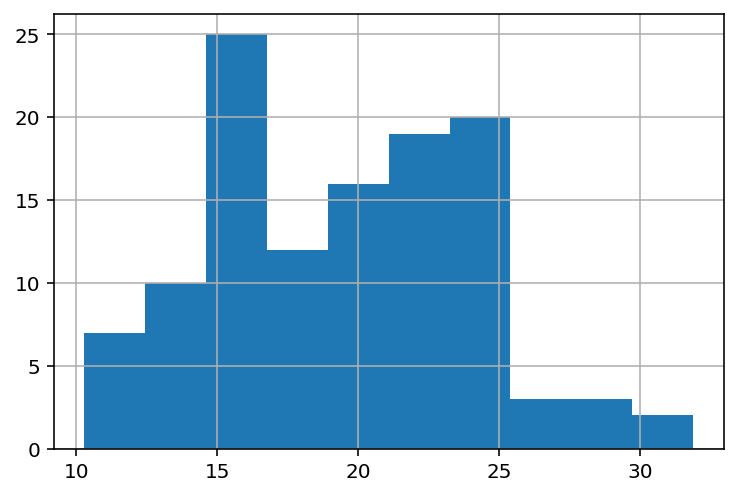

In [12]:
# plot distribution for fe_1999
plt.figure(figsize=(6,4))
fe_1999.hist()

<AxesSubplot:>

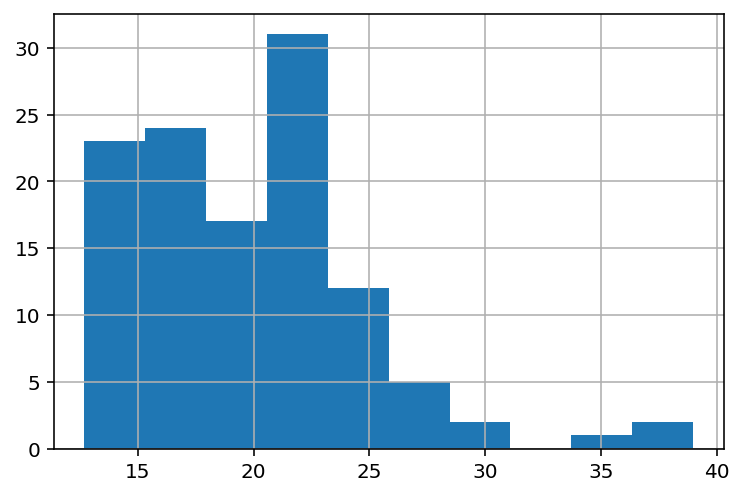

In [13]:
# plot distribution for fe_2008
plt.figure(figsize=(6,4))
fe_2008.hist()

**C. Set Alpha**
* remember that our confidence level determines our alpha (```α```), 
* which we use to compare to ```p```

In [14]:
α = 0.05

**D. Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [15]:
o1 = stats.norm(90, 15).rvs(40)
o2 = stats.norm(100, 20).rvs(50)
print(o1.var())
print(o2.var())

126.69454014924779
356.5773363753914


In [16]:
# how many observations I have for each sample? (N>30,we we meet normality condition)

fe_1999.count(), fe_2008.count()

(117, 117)

In [17]:
# is the variance same for both sample? No

fe_1999.var(), fe_2008.var()

(22.550836772260343, 25.850396545865912)

In [18]:
# stats Levene test - returns p value. small p-value means unequal variances
stats.levene(fe_1999, fe_2008)

# high p-value suggests that the populations have equal variances

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

**E. Compute test statistic and probability (t-statistic & p-value)**

- scipy.stats.ttest_1samp
- For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼  and  𝑡 > 0. 

In [19]:
stat, p_val = stats.levene(fe_1999, fe_2008)

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(fe_1999, fe_2008, equal_var = False)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')
else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(fe_1999, fe_2008, equal_var = True)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = True (we will assume equal variance)
t-stat: -0.3011962975077886
p-value: 0.7635345888327115


In [20]:
"""
# One-Tail
if (t > 0) and ((p / 2) < α):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
"""

# Two-Tail
if p_val < α:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


In [21]:
fe_1999.mean(), fe_2008.mean()

(19.488662986569054, 19.68238764869729)

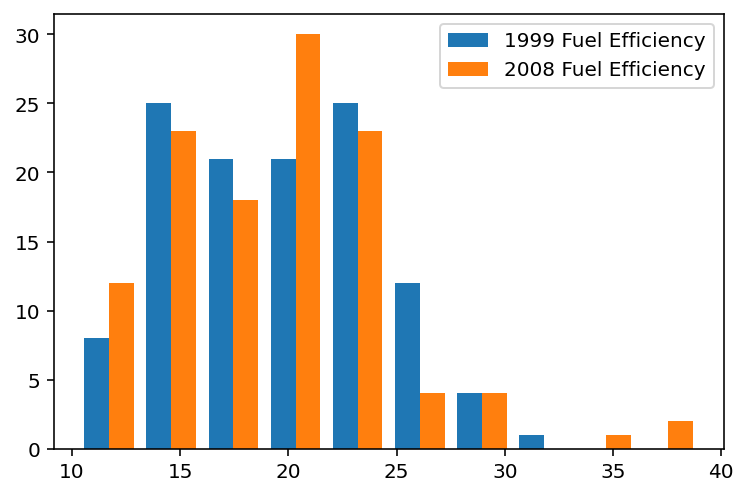

In [22]:
plt.figure(figsize=(6, 4))
plt.hist([fe_1999, fe_2008], label=["1999 Fuel Efficiency", "2008 Fuel Efficiency"])
plt.legend(loc="upper right")

### 3.2 Are compact cars more fuel-efficient than the average car?

**A. Set Hypothesis**

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **one_tail = fe_compact.mean > fe_all.mean**


* One Sample or Two Samples?\
 **one_sample (compact)**


* Continuous or Discreat?\
 **Discreat (compact) vs Continuous (fuel_efficiency) = T-Test**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: compact cars are ```less``` fuel efficient than the average car**\
 ```fe_compact.mean``` <= ```fe_all.mean```


* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: compact cars are ```more``` fuel efficient than the average car**\
 ```fe_compact.mean``` > ```fe_all.mean```

**B. Plot Distribution**

In [23]:
fe_compact = mpg[mpg['class'] == 'compact'].fuel_efficiency
μ = mpg.fuel_efficiency.mean()
fe_compact.head(), μ

(1    22.212766
 2    24.360000
 3    24.313725
 4    24.705882
 5    19.809524
 Name: fuel_efficiency, dtype: float64,
 19.585525317633177)

<AxesSubplot:>

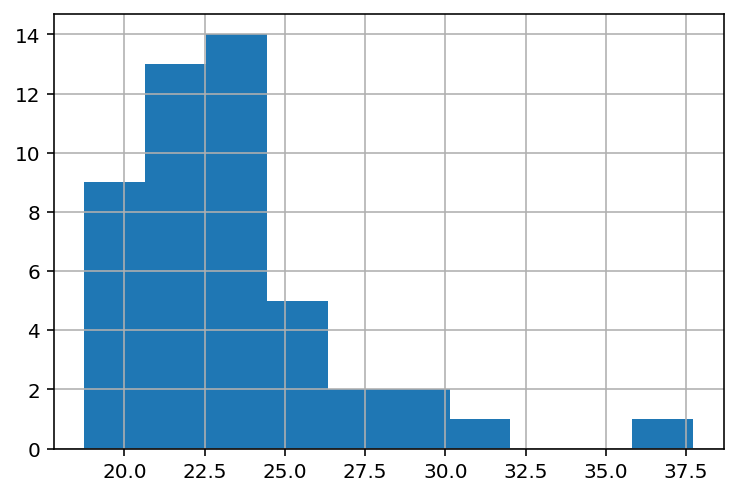

In [24]:
# plot distribution for fe_compact
plt.figure(figsize=(6,4))
fe_compact.hist()

**C. Set Alpha**
* remember that our confidence level determines our alpha (```α```), 
* which we use to compare to ```p```

In [25]:
α = 0.05

**D. Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [26]:
# how many observations I have for each sample? (N>30,we we meet normality condition)

fe_compact.count()

47

**E. Compute test statistic and probability (t-statistic & p-value)**

- scipy.stats.ttest_1samp
- For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼  and  𝑡 > 0. 

In [27]:
print('equal_var = True (we will assume equal variance)')
#Using Scipy 
t_stat, p_val = stats.ttest_1samp(fe_compact, μ)
t_stat, p_val/2, α

equal_var = True (we will assume equal variance)


(7.512360093161354, 7.808833174403837e-10, 0.05)

In [28]:
"""
# One-Tail
if (t > 0) and ((p / 2) < α):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
"""

# Two-Tail
if p_val < α:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


In [29]:
fe_compact.mean(), mpg.fuel_efficiency.mean()

(23.500416808701296, 19.585525317633177)

In [30]:
t_stat, p_val/2, α

(7.512360093161354, 7.808833174403837e-10, 0.05)

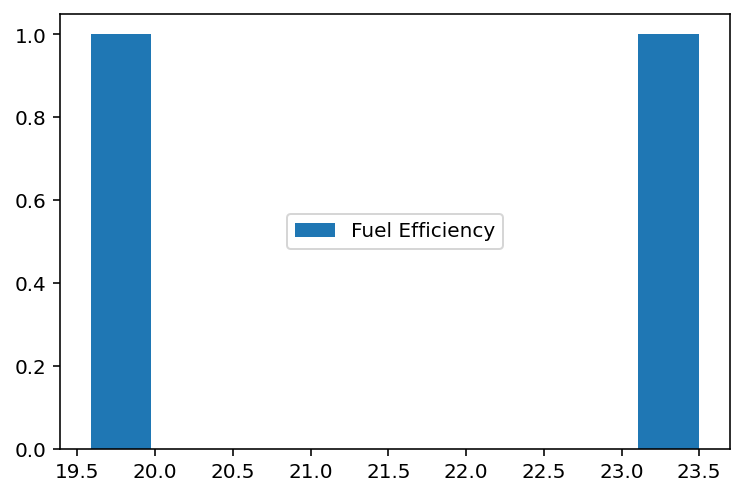

In [31]:
plt.figure(figsize=(6, 4))
plt.hist([fe_compact.mean(), mpg.fuel_efficiency.mean()], label=["Fuel Efficiency"])
plt.legend(loc="center")

### 3.3 Do manual cars get better gas mileage than automatic cars?

**A. Set Hypothesis**

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **one_tail = fe_manual.mean > fe_auto.mean**


* One Sample or Two Samples?\
 **two_sample (manual, auto)**


* Continuous or Discreat?\
 **Discreat (manual, auto) vs Continuous (fuel_efficiency) = T-Test**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: manual cars are ```less``` fuel efficient than automatic cars**\
 ```fe_manual.mean``` <= ```fe_auto.mean```


* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: manual cars are ```more``` fuel efficient than automatic cars**\
 ```fe_manual.mean``` > ```fe_auto.mean```

**B. Plot Distribution**

In [32]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727


In [33]:
fe_manual = mpg[mpg.trans.str.contains('manual')].fuel_efficiency
fe_auto = mpg[mpg.trans.str.contains('auto')].fuel_efficiency

<AxesSubplot:>

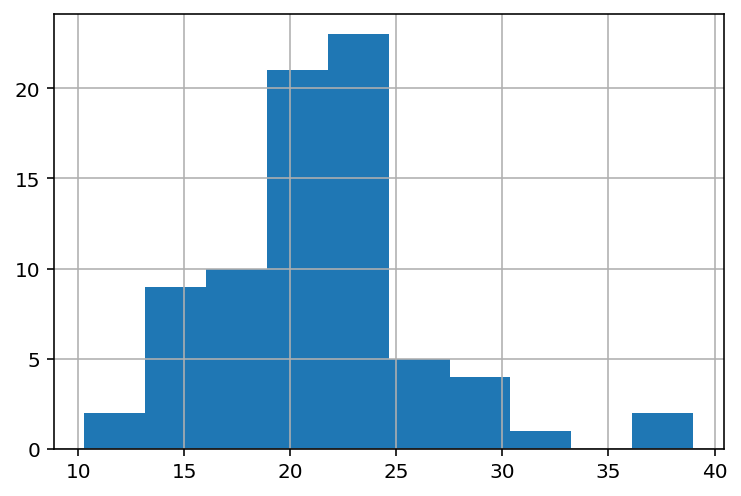

In [34]:
# plot distribution for fe_manual
plt.figure(figsize=(6,4))
fe_manual.hist()

<AxesSubplot:>

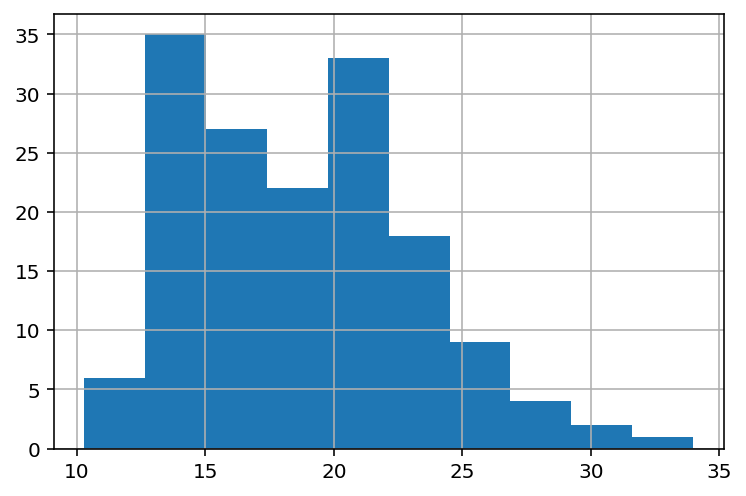

In [35]:
# plot distribution for fe_auto
plt.figure(figsize=(6,4))
fe_auto.hist()

**C. Set Alpha**
* remember that our confidence level determines our alpha (```α```), 
* which we use to compare to ```p```

In [36]:
α = 0.05

**D. Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [37]:
fe_manual.count(), fe_auto.count()

(77, 157)

In [38]:
# is the variance same for both sample? No

fe_manual.var(), fe_auto.var()

(25.665633639828275, 20.428279095002054)

In [39]:
# stats Levene test - returns p value. small p-value means unequal variances
stats.levene(fe_manual, fe_auto)

# high p-value suggests that the populations have equal variances

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

**E. Compute test statistic and probability (t-statistic & p-value)**

- scipy.stats.ttest_1samp
- For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼  and  𝑡 > 0. 

In [40]:
t_stat, p_val = stats.levene(fe_manual, fe_auto)

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(fe_manual, fe_auto, equal_var = False)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')
else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    print(t_stat, p_val/2, α)

equal_var = True (we will assume equal variance)
0.013901207169738269 0.45312311405077466 0.05


In [41]:
# One-Tail
if (t_stat > 0) and ((p_val / 2) < α):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

# Two-Tail
#if p_val < α:
#    print('We can reject the null hypothesis')
#else:
#    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


In [42]:
fe_manual.mean(), fe_auto.mean()

(21.629228592155194, 18.583199507835747)

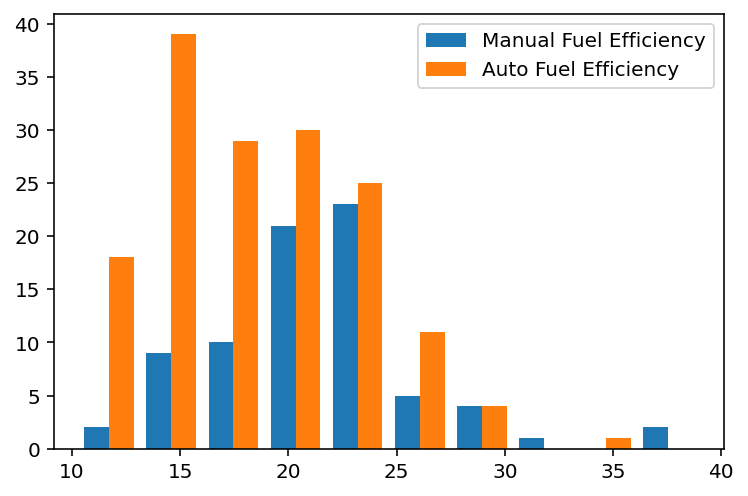

In [43]:
plt.figure(figsize=(6, 4))
plt.hist([fe_manual, fe_auto], label=["Manual Fuel Efficiency", "Auto Fuel Efficiency"])
plt.legend(loc="upper right")

# Exercise 3 - Correlation
Continue working in your ```hypothesis_testing``` notebook.

### 1. Answer with the type of stats test you would use (assume normal distribution):

### 1.1 Is there a relationship between the length of your arm and the length of your foot?

* Pearson's = ```Continuous``` vs ```Continuous``` (linear)

### 1.2 Do guys and gals quit their jobs at the same rate?

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **two_tail = guy_rate.mean == gal_rate.mean**

* One Sample or Two Samples?\
 **two_sample (guy, gal)**

* Continuous or Discreat?\
 **Discreat (guy, gal) vs Continuous (rate) = T-Test**
     * T-Test = ```Discreat``` vs ```Continuous```

### 1.3 Does the length of time of the lecture correlate with a students grade?

**Discreat (letter_grade) vs Continuous (lecture_length) = T-Test**
* T-Test = ```Discreat``` vs ```Continuous```

###                                            **OR**

**Continuous (float_grade) vs Continuous (lecture_length) = Pearson's**
* Pearson's = ```Continuous``` vs ```Continuous``` (linear)

###                                            **OR**

**Discreat (letter_grade) vs Discreat (lecture_length_in_buckets ['short', 'medium', 'long']) = $Chi^2$**
* $Chi^2$ = ```Discreat``` vs ```Discreat```

### 2. Use the ```telco_churn``` data.

In [44]:
from env import get_db_url

In [45]:
sql = 'SELECT * FROM customers JOIN internet_service_types USING (internet_service_type_id)'
url = get_db_url('telco_churn')

In [46]:
df = pd.read_sql(sql, url)
df.head()

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,Yes,Yes,No,2,Yes,2,65.6,593.3,No,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,No,No,Yes,1,No,2,59.9,542.4,No,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,No,No,No,1,Yes,1,73.9,280.85,Yes,Fiber optic
3,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,...,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,Fiber optic
4,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,...,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,Fiber optic


In [47]:
df.shape

(7043, 22)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   customer_id               7043 non-null   object 
 2   gender                    7043 non-null   object 
 3   senior_citizen            7043 non-null   int64  
 4   partner                   7043 non-null   object 
 5   dependents                7043 non-null   object 
 6   tenure                    7043 non-null   int64  
 7   phone_service             7043 non-null   object 
 8   multiple_lines            7043 non-null   object 
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [49]:
df.describe()

,internet_service_type_id,senior_citizen,tenure,contract_type_id,payment_type_id,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.872923,0.162147,32.371149,1.690473,2.315633,64.761692
std,0.737796,0.368612,24.559481,0.833755,1.148907,30.090047
min,1.000000,0.000000,0.000000,1.000000,1.000000,18.250000
25%,1.000000,0.000000,9.000000,1.000000,1.000000,35.500000
50%,2.000000,0.000000,29.000000,1.000000,2.000000,70.350000
75%,2.000000,0.000000,55.000000,2.000000,3.000000,89.850000
max,3.000000,1.000000,72.000000,3.000000,4.000000,118.750000


In [50]:
df.columns.to_list()

['internet_service_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type_id',
 'paperless_billing',
 'payment_type_id',
 'monthly_charges',
 'total_charges',
 'churn',
 'internet_service_type']

In [51]:
df = df[['tenure', 'monthly_charges', 'total_charges', 'internet_service_type', 'phone_service']]

In [52]:
df

,tenure,monthly_charges,total_charges,internet_service_type,phone_service
0,9,65.60,593.3,DSL,Yes
1,9,59.90,542.4,DSL,Yes
2,4,73.90,280.85,Fiber optic,Yes
3,13,98.00,1237.85,Fiber optic,Yes
4,3,83.90,267.4,Fiber optic,Yes
...,...,...,...,...,...
7038,13,55.15,742.9,DSL,Yes
7039,22,85.10,1873.7,Fiber optic,Yes
7040,2,50.30,92.75,DSL,Yes
7041,67,67.85,4627.65,DSL,Yes


In [53]:
df.internet_service_type.unique()

array(['DSL', 'Fiber optic', 'None'], dtype=object)

In [54]:
df.shape

(7043, 5)

In [55]:
df.tenure.count(), df.total_charges.count()

(7043, 7043)

In [56]:
df.total_charges.dtype

dtype('O')

In [57]:
df.total_charges.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: total_charges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [58]:
df.sort_values(by='total_charges').head()

,tenure,monthly_charges,total_charges,internet_service_type,phone_service
2855,0,73.35,,DSL,Yes
3118,0,52.55,,DSL,No
3052,0,25.75,,None,Yes
5433,0,19.85,,None,Yes
1731,0,20.00,,None,Yes


In [59]:
df.total_charges.value_counts() # whitespace characters used as null values

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [60]:
df.total_charges = df.total_charges.replace(' ', np.nan).astype(float)

In [61]:
df.info() # several null values in total charges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tenure                 7043 non-null   int64  
 1   monthly_charges        7043 non-null   float64
 2   total_charges          7032 non-null   float64
 3   internet_service_type  7043 non-null   object 
 4   phone_service          7043 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 275.2+ KB


In [62]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tenure                 7032 non-null   int64  
 1   monthly_charges        7032 non-null   float64
 2   total_charges          7032 non-null   float64
 3   internet_service_type  7032 non-null   object 
 4   phone_service          7032 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 329.6+ KB


### 2.1 Does tenure correlate with monthly charges?

**A. Set Hypothesis**

* Continuous or Discreat?\
 **Continuous (tenure) vs Continuous (monthly_charges) = Pearson's**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: There is NO ```linear``` relationship between tenure and monthly charges**\
 

* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: There is a ```linear``` relationship between tenure and monthly charges**\

**B. Plot Distribution**

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

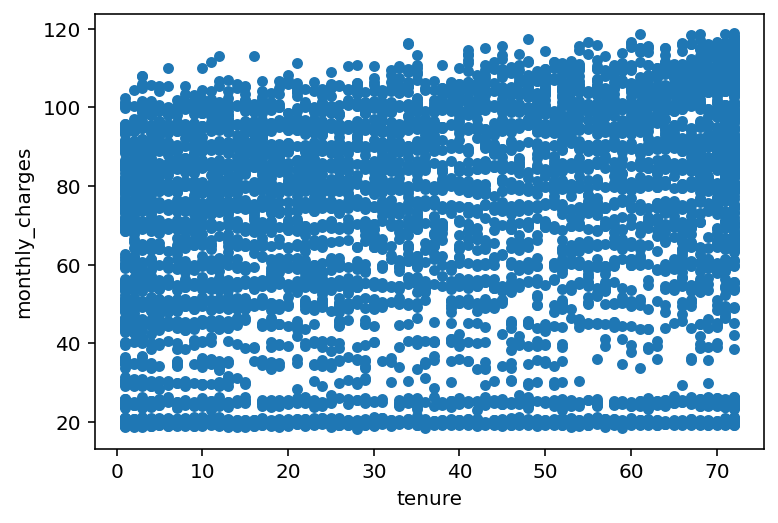

In [63]:
df.plot.scatter(y='monthly_charges', x='tenure')

**C. Set Alpha**
* remember that our confidence level determines our alpha (```α```), 
* which we use to compare to ```p```

In [64]:
α = 0.05

**D. Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [65]:
df.tenure.count(), df.monthly_charges.count()

(7032, 7032)

**E. Compute test statistic and probability (t-statistic & p-value)**

In [66]:
r, p = stats.pearsonr(df.tenure, df.monthly_charges)
r, p

(0.2468617666408956, 3.9898213232510553e-98)

In [67]:
if p < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


### 2.2 Total charges?

**A. Set Hypothesis**

* Continuous or Discreat?\
 **Continuous (tenure) vs Continuous (total_charges) = Pearson's**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: There is NO ```linear``` relationship between tenure and total charges**\
 

* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: There is a ```linear``` relationship between tenure and total charges**\

**B. Plot Distribution**

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

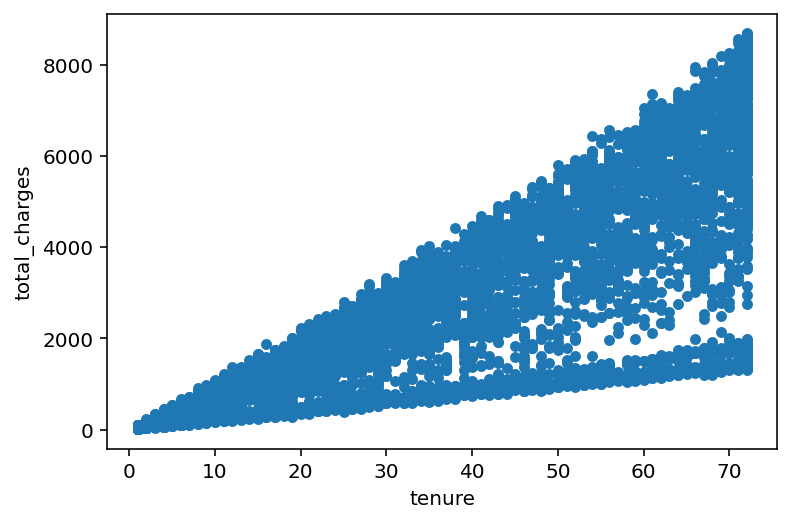

In [68]:
df.plot.scatter(y='total_charges', x='tenure')

**C. Set Alpha**
* remember that our confidence level determines our alpha (```α```), 
* which we use to compare to ```p```

In [69]:
α = 0.05

**D. Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [70]:
df.total_charges.count()

7032

**E. Compute test statistic and probability (t-statistic & p-value)**

In [71]:
r, p = stats.pearsonr(df.tenure, df.total_charges)
r, p

(0.8258804609332071, 0.0)

In [72]:
if p < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


### 2.3 What happens if you control for phone and internet service?

In [73]:
def corr_tenure_and_monthly(df):
    # returns the results of a pearson's r correlation test run on the dataframe
    return pd.Series(stats.pearsonr(df.tenure, df.monthly_charges), index = ['r', 'p'])

In [74]:
# Do stuff faster with this ONE TRICK stakeholders hate!
# Groupby your control group(s)
# Apply the function that runs your stats test
df.groupby(['phone_service', 'internet_service_type']).apply(corr_tenure_and_monthly)

r              p
phone_service internet_service_type                         
No            DSL                    0.592430   1.173274e-65
Yes           DSL                    0.658094  5.781402e-216
              Fiber optic            0.624621   0.000000e+00
              None                   0.346188   4.896605e-44

In [75]:
df.groupby(['phone_service']).apply(corr_tenure_and_monthly)

,r,p
phone_service,,
No,0.592430,1.173274e-65
Yes,0.244194,6.828016e-87


In [76]:
df.groupby(['internet_service_type']).apply(corr_tenure_and_monthly)

,r,p
internet_service_type,,
DSL,0.519701,2.889519e-167
Fiber optic,0.624621,0.000000e+00
None,0.346188,4.896605e-44


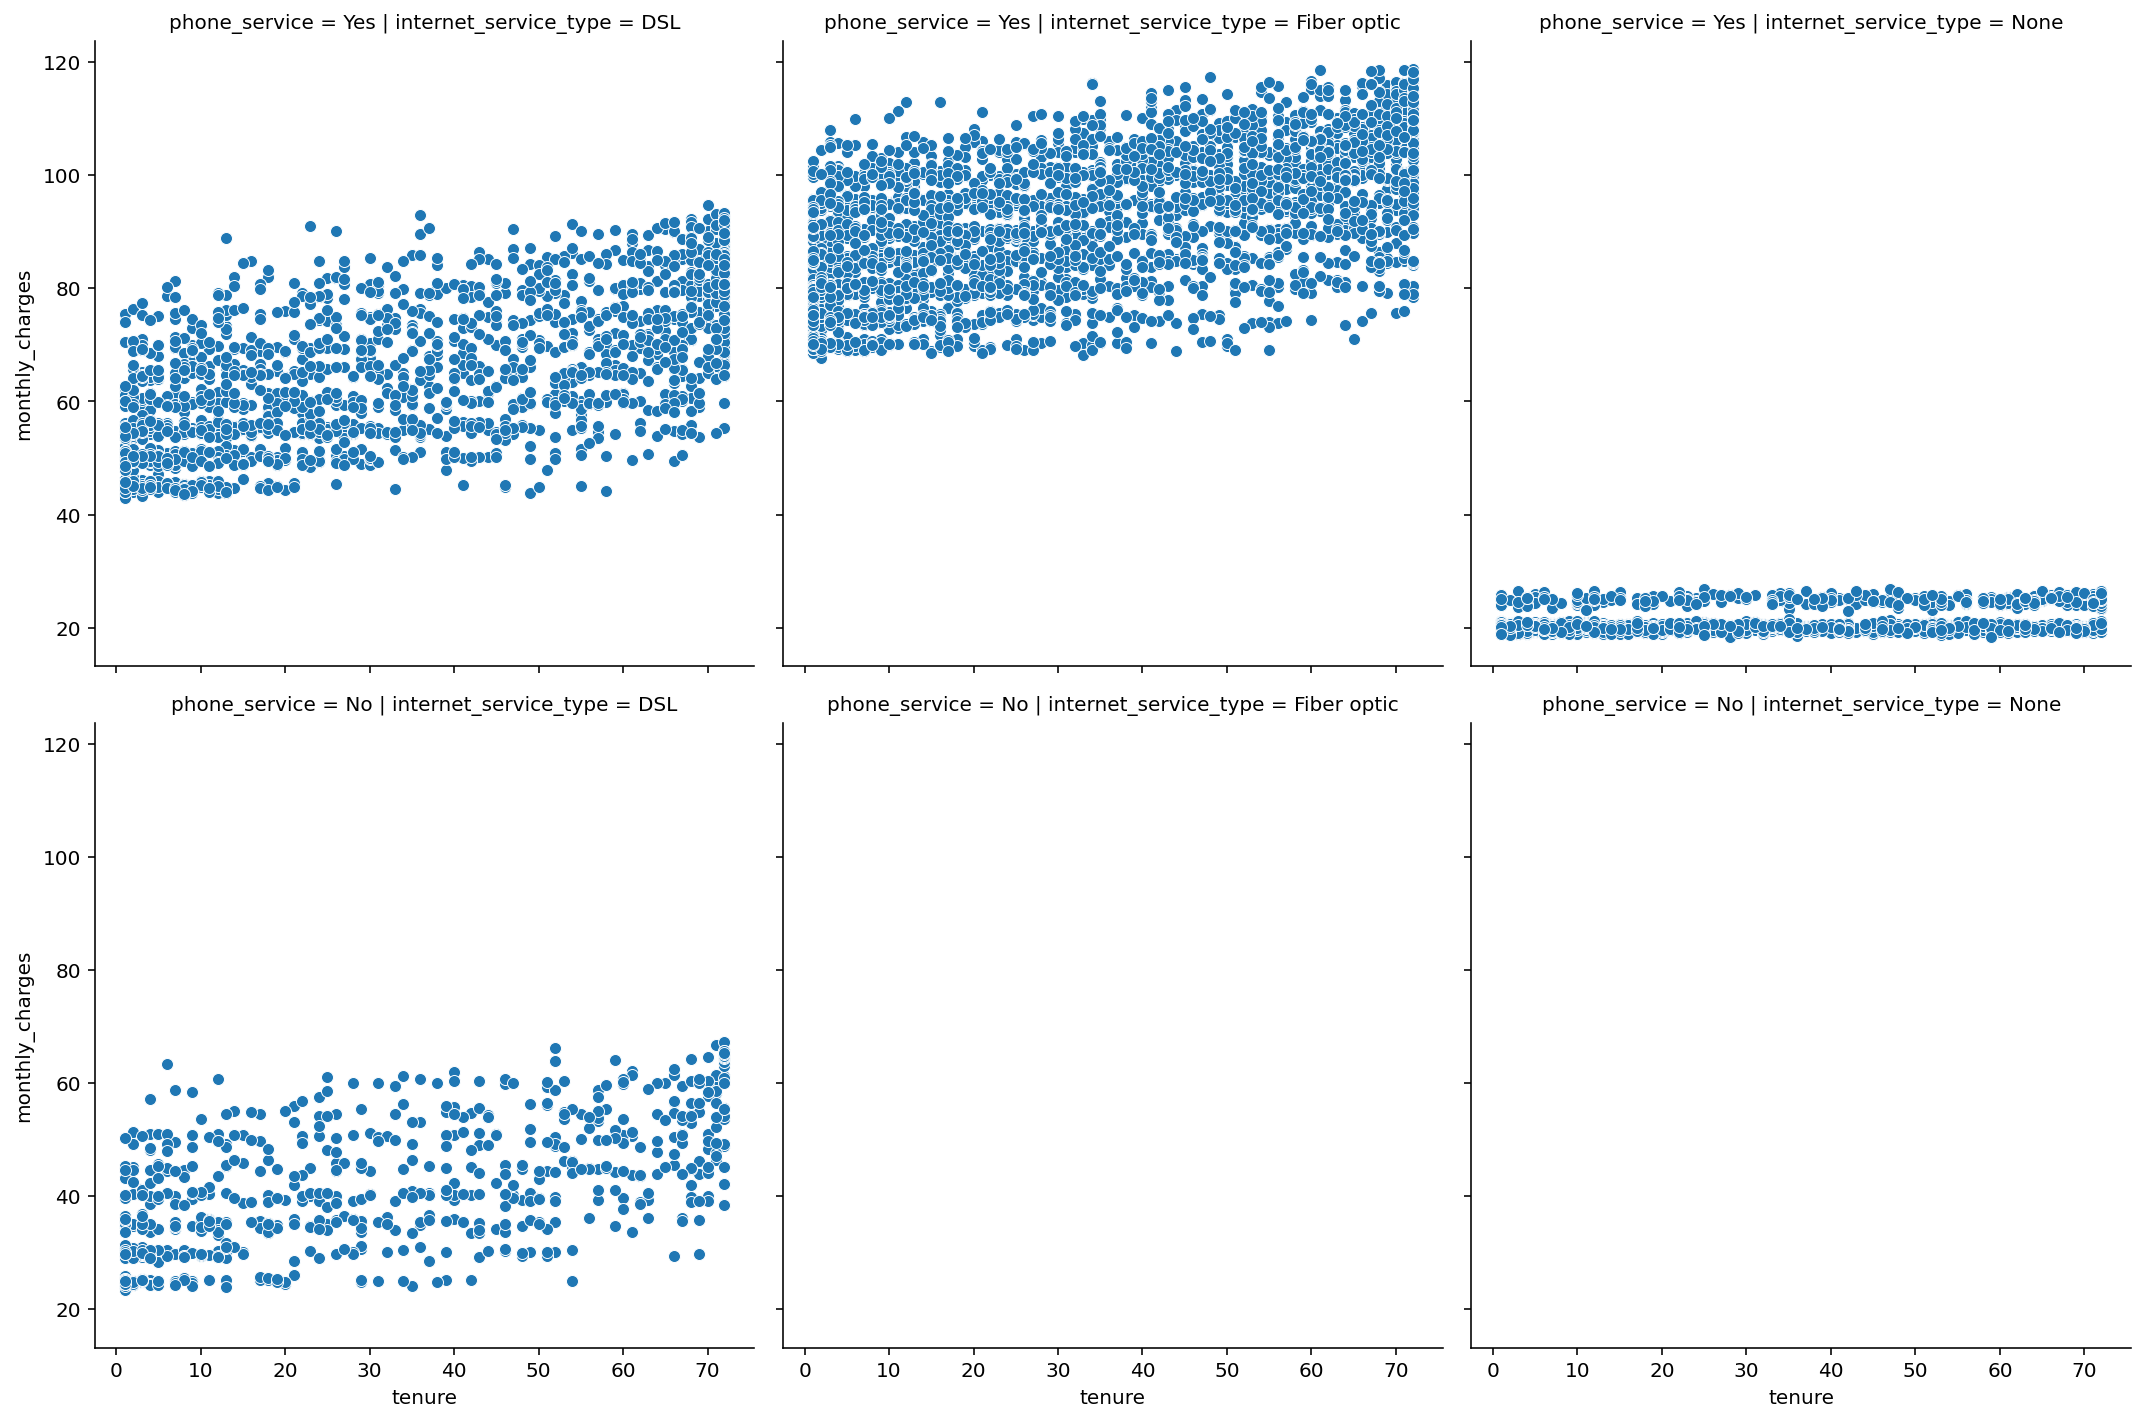

In [77]:
sns.relplot(data=df, y='monthly_charges', x='tenure', col='internet_service_type', row='phone_service')

### 3. Use the ```employees``` database.

In [78]:
sql = """SELECT DATEDIFF((SELECT MAX(hire_date) 
            FROM employees), e.hire_date) AS tenure, s.salary AS salary 
            FROM employees AS e 
            JOIN salaries s USING (emp_no) 
            WHERE s.to_date > NOW()"""
url = get_db_url('employees')

In [79]:
employees_with_salaries = pd.read_sql(sql, url)
employees_with_salaries

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692
...,...,...
240119,2572,52868
240120,3410,69501
240121,5030,83441
240122,2298,55003


### 3.1 Is there a relationship between how long an employee has been with the company and their salary?

**A. Set Hypothesis**

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **Two_Tails = Different**


* One Sample or Two Samples?\
 **Two_Sample (Tenure, Salary)**


* Continuous or Discreat?\
 **Continuous (Tenure) vs Continuous (Salary) = Pearson's R**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: There is no ```linear relationship``` between employee Tenure and Salary**\
 ```employee.tenure.mean``` and ```employee.salary.mean``` are NOT linear


* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: There is a ```linear relationship``` between employee Tenure and Salary**\
 ```employee.tenure.mean``` and ```employee.salary.mean``` are linear

**B. Plot Distribution**

In [80]:
stats.pearsonr(employees_with_salaries.tenure, employees_with_salaries.salary)

(0.3064625613186014, 0.0)

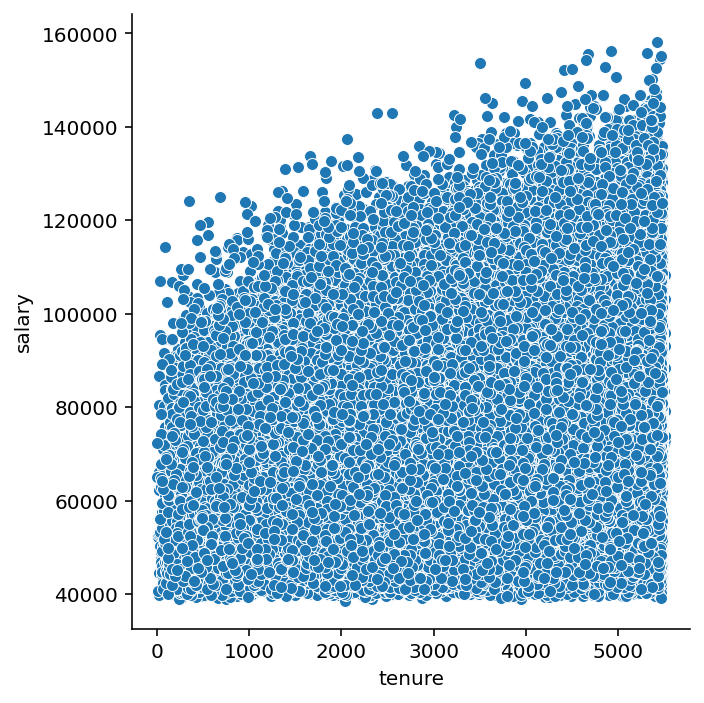

In [81]:
sns.relplot(data=employees_with_salaries, y='salary', x='tenure')

**C. Set Alpha**
* remember that our confidence level determines our alpha (```α```), 
* which we use to compare to ```p```

In [82]:
α = 0.05

**D. Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [83]:
employees_with_salaries.tenure.count(), employees_with_salaries.salary.count()

(240124, 240124)

**E. Compute test statistic and probability (t-statistic & p-value)**

In [84]:
r, p = stats.pearsonr(employees_with_salaries.tenure, employees_with_salaries.salary)
r, p

(0.3064625613186014, 0.0)

In [85]:
if p < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


### 3.2 Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [86]:
sql = """
SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    title_count
FROM employees e
JOIN (
    SELECT emp_no, COUNT(*) as title_count
    FROM employees e
    JOIN titles t USING (emp_no)
    GROUP BY emp_no
) emp_title_count USING (emp_no)
"""

In [87]:
employees_with_titles = pd.read_sql(sql, url)
employees_with_titles.head()

,emp_no,tenure,title_count
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2


In [88]:
employees_with_titles.shape

(300024, 3)

**A. Set Hypothesis**

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **Two_Tails = Different**


* One Sample or Two Samples?\
 **Two_Sample (Tenure, Titles)**


* Continuous or Discreat?\
 **Continuous (Tenure) vs Discreat (Titles) = Pearson's R**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: There is no ```linear relationship``` between employee Tenure and Titles held**\
 ```employee.tenure.mean``` and ```employee.title_count.mean``` are NOT linear


* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: There is a ```linear relationship``` between employee Tenure and Titles held**\
 ```employee.tenure.mean``` and ```employee.title_count.mean``` are linear

**B. Plot Distribution**

In [89]:
stats.pearsonr(employees_with_titles.tenure, employees_with_titles.title_count)

(0.2665989299134097, 0.0)

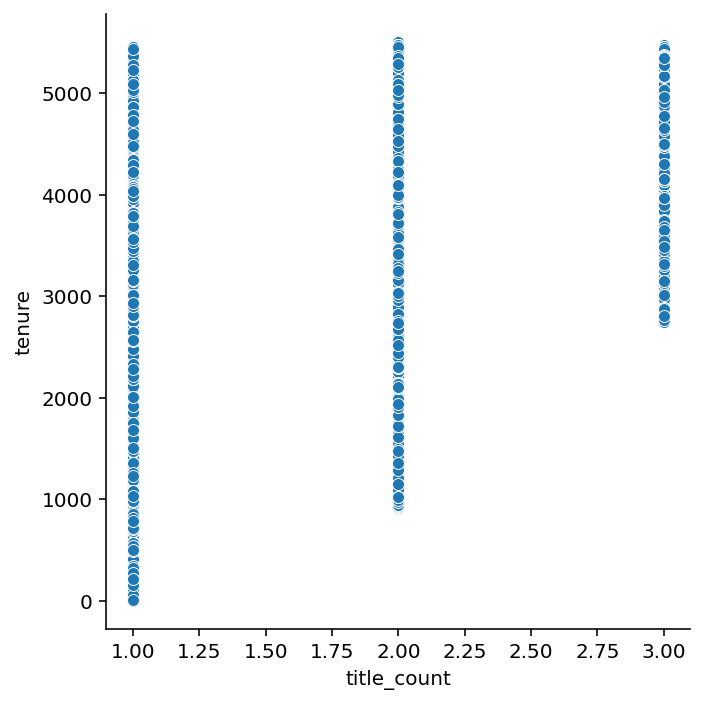

In [90]:
sns.relplot(data=employees_with_titles, y='tenure', x='title_count')

**C. Set Alpha**
* remember that our confidence level determines our alpha (```α```), 
* which we use to compare to ```p```

In [91]:
α = 0.05

**D. Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [92]:
employees_with_titles.tenure.count(), employees_with_titles.title_count.count()

(300024, 300024)

**E. Compute test statistic and probability (t-statistic & p-value)**

In [93]:
r, p = stats.pearsonr(employees_with_titles.tenure, employees_with_titles.title_count)
r, p

(0.2665989299134097, 0.0)

In [94]:
if p < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


### 4. Use the ```sleepstudy``` data.

### 4.1 Is there a relationship between days and reaction time?

In [95]:
pydataset.data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [96]:
sleep_df = pydataset.data('sleepstudy')
sleep_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [97]:
sleep_df.shape

(180, 3)

In [98]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [99]:
sleep_df.describe()

,Reaction,Days,Subject
count,180.000000,180.000000,180.000000
mean,298.507892,4.500000,341.277778
std,56.328757,2.880293,20.320905
min,194.332200,0.000000,308.000000
25%,255.375825,2.000000,331.000000
50%,288.650800,4.500000,336.000000
75%,336.752075,7.000000,352.000000
max,466.353500,9.000000,372.000000


**A. Set Hypothesis**
4.1 Is there a relationship between days and reaction time?

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **Two_Tails = Different**


* One Sample or Two Samples?\
 **Two_Sample (Tenure, Titles)**


* Continuous or Discreat?\
 **Discreat (days) vs Continuous (reaction_time) = Pearson's R**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: There is no ```linear relationship``` between days of sleep and reaction time**\
 ```sleep_df.Days.mean``` and ```sleep_df.Reaction.mean``` are NOT linear


* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: There is a ```linear relationship``` between days of sleep and reaction time**\
 ```sleep_df.Days.mean``` and ```sleep_df.Reaction.mean``` are linear

**B. Plot Distribution**

In [100]:
stats.pearsonr(sleep_df.Days, sleep_df.Reaction)

(0.5352302262650255, 9.89409632221439e-15)

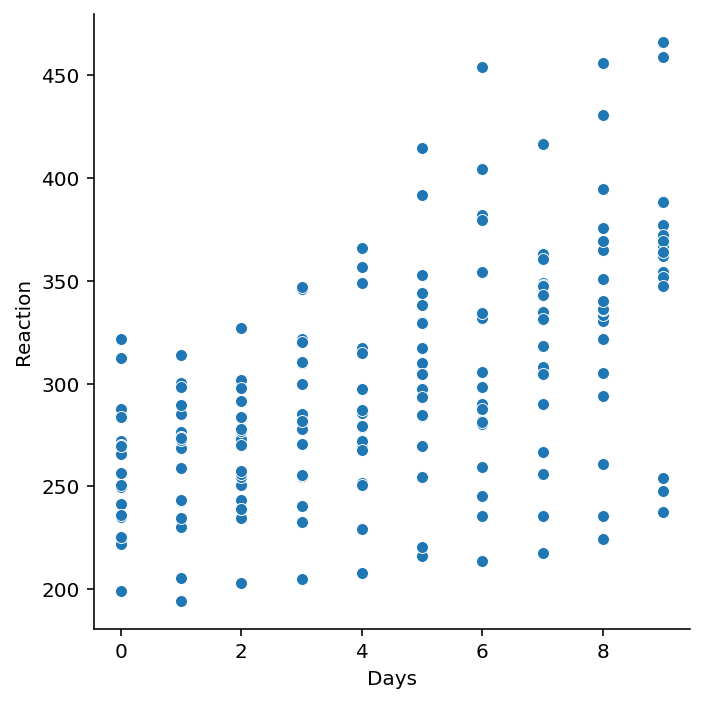

In [101]:
sns.relplot(data=sleep_df, x='Days', y='Reaction')

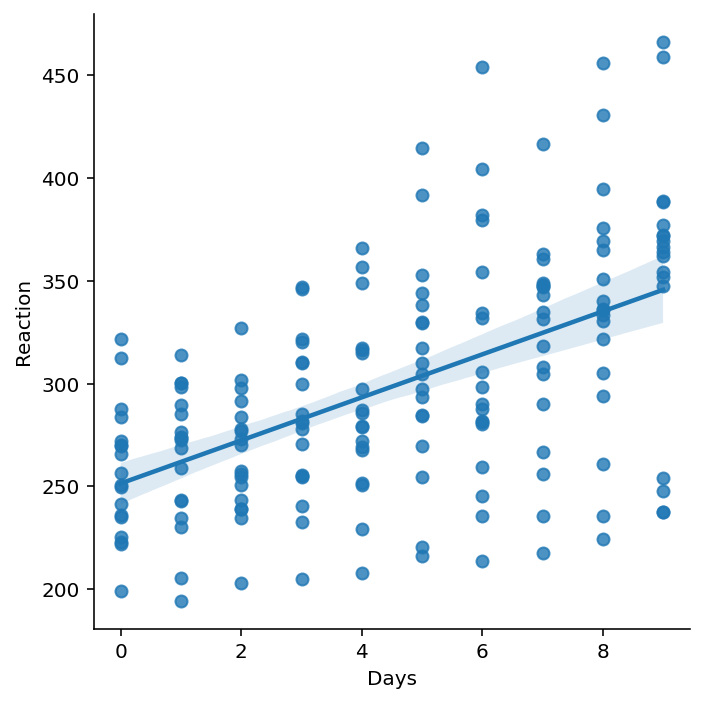

In [102]:
sns.lmplot(data=sleep_df, x='Days', y='Reaction')

**C. Set Alpha**
* remember that our confidence level determines our alpha (```α```), 
* which we use to compare to ```p```

In [103]:
α = 0.05

**D. Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [104]:
sleep_df.Days.count(), sleep_df.Reaction.count()

(180, 180)

**E. Compute test statistic and probability (t-statistic & p-value)**

In [105]:
r, p = stats.pearsonr(sleep_df.Days, sleep_df.Reaction)
r, p

(0.5352302262650255, 9.89409632221439e-15)

In [106]:
if p < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


# Exercise 4 - Chi Squared

Continue working in your ```hypothesis_testing``` notebook.

### 1. Answer with the type of stats test you would use (assume normal distribution):

### 1.1 Do students get better test grades if they have a rubber duck on their desk?

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **One_Tail = with_Duckie.grades.mean > without_Duckie.grades.mean**


* One Sample or Two Samples?\
 **Two Samples (with, without)**


* Continuous or Discreat?\
 **Discreat (Rubber Duckie) vs Continuous (Test Grades) = T-Test**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


### 1.2 Does smoking affect when or not someone has lung cancer?

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **Two_tails = Smoker == Cancer**


* One Sample or Two Samples?\
 **Two Samples (Smoker, Cancer)**


* Continuous or Discreat?\
 **Discreat (Smoker) vs Discreat (Cancer) = $Chi^2$**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```

### 1.3 Is gender independent of a person’s blood type?

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **Two_Tails = Gender == Blood Type**


* One Sample or Two Samples?\
 **Two Samples (Gender, Blood Type)**


* Continuous or Discreat?\
 **Discreat (Gender) vs Discreat (Blood Type) = $Chi^2$**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```

### 1.4 A farming company wants to know if a new fertilizer has improved crop yield or not

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **One_Tail = New_Fertilizer.Crop_Yield.mean > Old_Fertilizer.Crop_Yield.mean**


* One Sample or Two Samples?\
 **Two Samples (New, Old)**


* Continuous or Discreat?\
 **Discreat (New Fertilizer) vs Continuous (Crop Yield) = T-Test**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```

### 1.5 Does the length of time of the lecture correlate with a students grade?

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **NO TAIL**


* One Sample or Two Samples?\
 **Two Samples (Lecture_Time, Float_Grade)**


* Continuous or Discreat?\
 **Continuous (Lecture Time) vs Continuous (Float Grade) = Pearson's R**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```

### 1.6 Do people with dogs live in apartments more than people with cats?

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **One_Tail = Dogs > Cats**


* One Sample or Two Samples?\
 **Two Samples (Pet_Type, Apartment_Bool)**


* Continuous or Discreat?\
 **Discreat (Dog, Cat) vs Discreat (Apartment_Bool) = $Chi^2$**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```

### 2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.


||Codeup Student|Not Codeup Student||
|---|---|---|---|
|Uses a Macbook|49|20|
|Doesn't Use A Macbook|1|30|


**B. Set Hypothesis**

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **Two_Tails = Student == MacBook**


* One Sample or Two Samples?\
 **Two Samples (Student, MacBook)**


* Continuous or Discreat?\
 **Discreat (Student) vs Discreat (MacBook) = $Chi^2$**
    * T-Test = ```Discreat``` vs ```Continuous```
    * Pearson's = ```Continuous``` vs ```Continuous``` (linear)
    * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: Using a MacBook is ```dependant``` of being a Codeup Student**\
 ```MacBook_True.mean``` == ```Codeup_Student.mean```


* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: Using a MacBook is **NOT** ```dependant``` of being a Codeup Student**\
 ```MacBook_True.mean``` != ```Codeup_Student.mean```

In [107]:
observed = ([49,20],[1,30])
observed

([49, 20], [1, 30])

In [108]:
observed = pd.DataFrame(observed)
observed

,0,1
0,49,20
1,1,30


In [109]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [110]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 1.4116760526193828e-09


In [111]:
if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


### 3. Choose another 2 categorical variables from the ```mpg``` dataset and perform a $chi^{2}$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [112]:
df = data('mpg')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [113]:
df.shape

(234, 11)

In [114]:
df.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [115]:
df.year.unique()

array([1999, 2008])

In [116]:
df.drv.unique()

array(['f', '4', 'r'], dtype=object)

**A. Set Hypothesis**

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **two_tail (drv, year)**


* One Sample or Two Samples?\
 **two_sample (drv, year)**


* Continuous or Discreat?\
 **Discreat (drv) vs Discreat (year) = $Chi^2$**
    * T-Test = ```Discreat``` vs ```Continuous```
    * Pearson's = ```Continuous``` vs ```Continuous``` (linear)
    * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: The type of drive is **NOT** ```dependant``` on the year of manufacture**\
 ```df.drv.mean ``` != ``` df.year.mean```


* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: The type of drive is ```dependant``` on the year of manufacture**\
 ```df.drv.mean``` == ```df.year.mean```

In [117]:
observed = pd.crosstab(df.drv, df.year)
observed

year,1999,2008
drv,,
4,49,54
f,57,49
r,11,14


In [118]:
observed = pd.DataFrame(observed)
observed

year,1999,2008
drv,,
4,49,54
f,57,49
r,11,14


In [119]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [120]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[49 54]
 [57 49]
 [11 14]]

Expected
[[51 51]
 [53 53]
 [12 12]]

----
chi^2 = 1.2065
p     = 0.547033073060878


In [121]:
if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


### 4. Use the data from the ```employees``` database to answer these questions:

### 4.1 Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

**A. Set Hypothesis**

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **two_tail (gender, department)**


* One Sample or Two Samples?\
 **two_sample (gender, department)**


* Continuous or Discreat?\
 **Discreat (gender) vs Discreat (department) = $Chi^2$**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: The employee gender is **NOT** ```dependent``` on the department of the employee**\
 ```employees.gender ``` != ```employees.department```


* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: The employee gender is ```dependent``` on the department of the employee**\
 ```employees.gender ``` == ```employees.department```

### 4.2 Is an employee's gender independent of whether or not they are or have been a manager?

**A. Set Hypothesis**

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **two_tail (gender, been_manager)**


* One Sample or Two Samples?\
 **two_sample (gender, been_manager)**


* Continuous or Discreat?\
 **Discreat (gender) vs Discreat (been_manager) = $Chi^2$**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: The employee gender is **NOT** ```dependent``` on whether the employee has been a manager**\
 ```employees.gender ``` != ```employees.been_manager```


* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: The employee gender is ```dependent``` on whether the employee has been a manager**\
 ```employees.gender ``` == ```employees.been_manager```